**# ALGORITMO: ÁRBOL DE DECISIÓN**

Método de aprendizaje supervisado, utilizado para regresión y clasificación.

Mediante la caracterización de datos y a partir de reglas simples permite realizar la predicción de una variable.



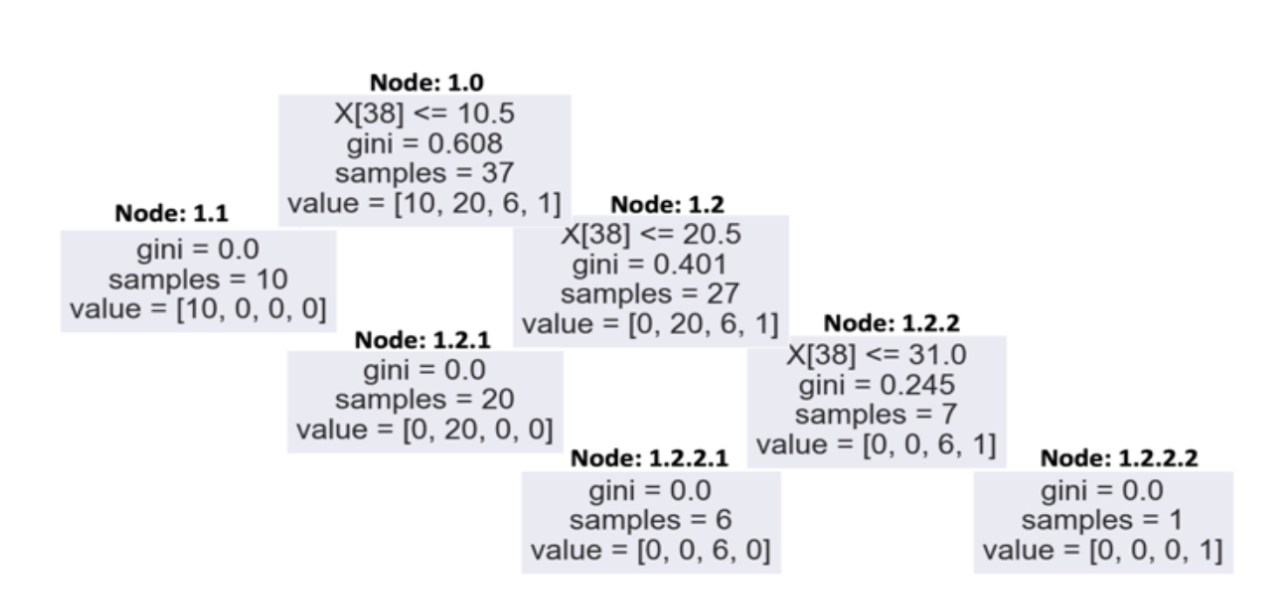


Ventajas



*   Requiere de poco procesamiento de datos
*   Permite la visualización de la arquitectura
*   Tiene la capacidad de llegar a la respuesta a través de múltiples caminos
*   Su validación se realiza mediante métricas de evaluación establecidas.
*   No requiere de un alto costo computacional





Desventajas:

*   Puede generar ramas que no generalicen los datos
*   Presenta inestabilidad por la variación de datos

In [1]:
#Numpy:  librería de Python especializada en el cálculo numérico y el análisis de datos.
import numpy as np

#Pandas: librería de Python especializada en el manejo y análisis de estructuras de datos.
import pandas as pd

#Matplotlib: librería de Python especializada en la creación de gráficos en dos dimensiones.
import matplotlib.pyplot as plt

#Seaborn: librería para Python que permite generar fácilmente elegantes gráficos.
import seaborn as sns

#Scikit-learn: biblioteca de Python ampliamente utilizada para el machine learning.

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
dataEMG = pd.read_csv('/content/drive/MyDrive/IA/Investigacion /EMG/emg_features_optimized.csv')
dataEMG

,Activity,Mobility,Complexity,Cluster
0,0.000006,0.258057,0.253174,0
1,0.000005,0.237183,0.304932,0
2,0.000004,0.263184,0.277832,0
3,0.000009,0.185425,0.371826,0
4,0.000026,0.096741,0.594727,0
...,...,...,...,...
471996,0.000002,0.409668,0.303955,0
471997,0.000002,0.361816,0.340332,0
471998,0.000002,0.418701,0.293213,0
471999,0.000003,0.343750,0.345459,0


In [4]:
dataEMG.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 472001 entries, 0 to 472000
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Activity    472001 non-null  float64
 1   Mobility    472001 non-null  float64
 2   Complexity  472001 non-null  float64
 3   Cluster     472001 non-null  int64  
dtypes: float64(3), int64(1)
memory usage: 14.4 MB


In [5]:
dataEMG['Cluster'].unique()

array([0, 1])

In [6]:
dataEMG['Cluster'].value_counts()

,count
Cluster,
1,284046
0,187955


In [7]:
x = dataEMG.drop('Cluster', axis = 1)

In [8]:
 y = dataEMG['Cluster']

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.2, random_state=1601)

In [10]:
net = DecisionTreeClassifier()
net.fit(x_train,y_train)
clf = net.fit(x_train,y_train)

In [11]:
predicciones = net.predict(x_test)

In [12]:
predicciones

array([1, 1, 1, ..., 1, 1, 0])

In [13]:
y_test

,Cluster
188106,1
120420,1
121241,1
105596,0
251567,0
...,...
45151,0
205996,0
270599,1
42048,1


El classification_report de Scikit-learn genera un resumen de métricas clave para evaluar un modelo de clasificación. Estas métricas incluyen:

Precisión (Precision): Qué proporción de predicciones positivas son correctas.
Sensibilidad o Recall: Qué proporción de los casos positivos reales fueron identificados correctamente.
F1-Score: Promedio armónico de precisión y sensibilidad (balance entre ambos).
Soporte (Support): Número de instancias reales de cada clase.
Se utiliza para analizar el rendimiento del modelo por clase y proporciona una visión general de su desempeño.

In [14]:
print(classification_report(y_test, predicciones, digits=4))

              precision    recall  f1-score   support

           0     0.9975    0.9980    0.9978    150475
           1     0.9987    0.9984    0.9985    227126

    accuracy                         0.9982    377601
   macro avg     0.9981    0.9982    0.9981    377601
weighted avg     0.9982    0.9982    0.9982    377601



La matriz de confusión es una herramienta para evaluar el desempeño de un modelo de clasificación. Es una tabla que compara las predicciones del modelo con los valores reales, mostrando el número de casos correctamente e incorrectamente clasificados.

In [15]:
print((y_test,predicciones))

(188106    1
120420    1
121241    1
105596    0
251567    0
         ..
45151     0
205996    0
270599    1
42048     1
144250    0
Name: Cluster, Length: 377601, dtype: int64, array([1, 1, 1, ..., 1, 1, 0]))


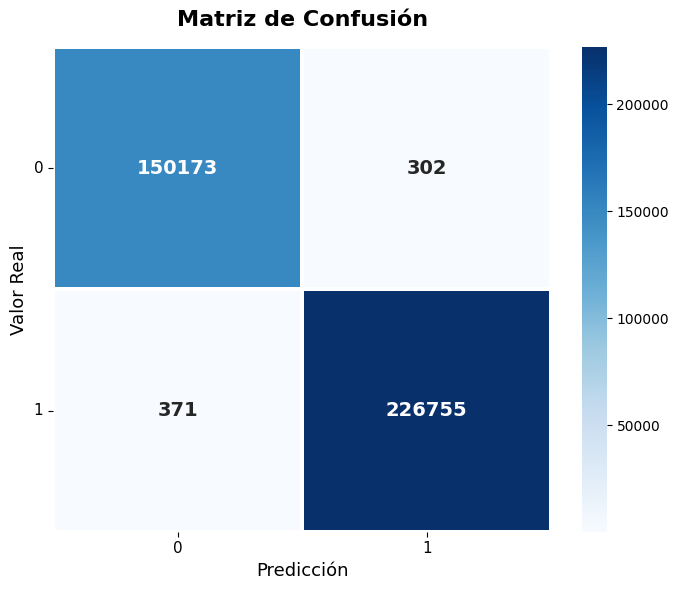

In [16]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# --- Calcular matriz de confusión ---
cm = confusion_matrix(y_test, predicciones)
labels = np.unique(y_test)  # etiquetas de clases detectadas

# --- Gráfica ---
plt.figure(figsize=(7, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=labels, yticklabels=labels,
            annot_kws={"size": 14, "weight": "bold"}, cbar=True, linewidths=1.5)

# --- Estilo ---
plt.title('Matriz de Confusión', fontsize=16, pad=15, weight='bold')
plt.xlabel('Predicción', fontsize=13)
plt.ylabel('Valor Real', fontsize=13)

# Ajustes estéticos
plt.xticks(fontsize=11)
plt.yticks(fontsize=11, rotation=0)
plt.tight_layout()

# Mostrar
plt.show()


In [17]:
from sklearn import tree

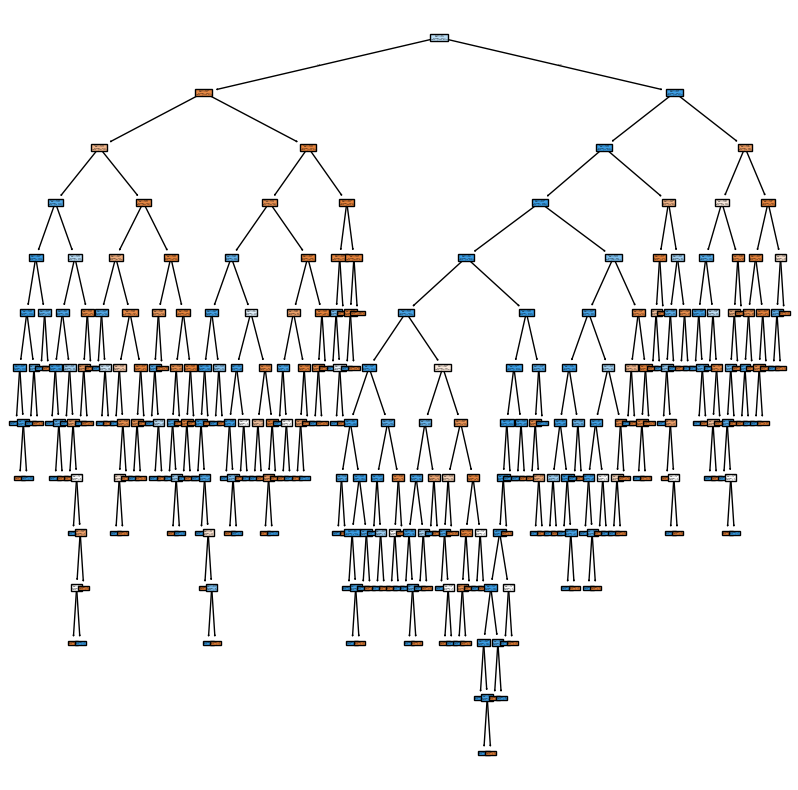

In [18]:
fig = plt.figure(figsize=(10, 10))
fig = tree.plot_tree(net, filled=True)

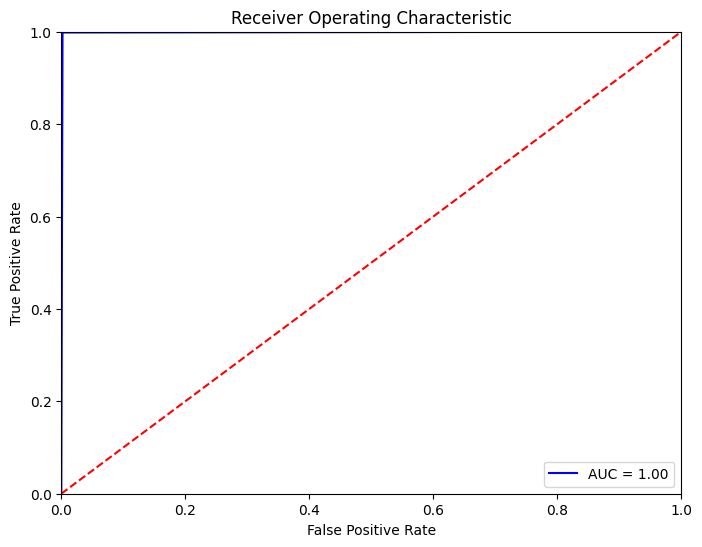

In [19]:
from sklearn.metrics import roc_curve, auc

# calculate the fpr and tpr for all thresholds of the classification
probs = net.predict_proba(x_test)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

# method I: plt
plt.figure(figsize=(8, 6))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [20]:
import time
import sys
import psutil
import os
import pickle
import numpy as np

# --- CONFIGURACIÓN ---
N_ITER = 1000  # Número de iteraciones para estimar tiempo promedio

# --- TIEMPO DE INFERENCIA (PROMEDIO Y DESVIACIÓN ESTÁNDAR) ---
tiempos = []
for _ in range(N_ITER):
    start_time = time.perf_counter()
    _ = net.predict(x_test)
    end_time = time.perf_counter()
    tiempos.append(end_time - start_time)

inference_mean = np.mean(tiempos)
inference_std = np.std(tiempos)
print(f"Inference time: {inference_mean:.6f} ± {inference_std:.6f} seconds "
      f"(based on {N_ITER} iterations)")

# --- CONSUMO DE MEMORIA DEL MODELO (MB) ---
model_memory_bytes = sys.getsizeof(net)
model_memory_mb = model_memory_bytes / (1024 ** 2)
print(f"Model memory (approx.): {model_memory_mb:.6f} MB")

# --- USO DE RAM DEL PROCESO (MB) ---
process = psutil.Process(os.getpid())
ram_usage_bytes = process.memory_info().rss
ram_usage_mb = ram_usage_bytes / (1024 ** 2)
print(f"RAM usage: {ram_usage_mb:.6f} MB")

# --- USO DE ESPACIO EN DISCO (MB) ---
model_filename = 'decision_tree_model.pkl'
with open(model_filename, 'wb') as f:
    pickle.dump(net, f)
disk_usage_bytes = os.path.getsize(model_filename)
disk_usage_mb = disk_usage_bytes / (1024 ** 2)
os.remove(model_filename)
print(f"Model disk space (exported): {disk_usage_mb:.6f} MB")


Inference time: 0.025684 ± 0.006313 seconds (based on 1000 iterations)
Model memory (approx.): 0.000046 MB
RAM usage: 337.371094 MB
Model disk space (exported): 0.027071 MB


In [23]:
import pickle

# Define the path to save the model in Google Drive
model_save_path = '/content/drive/MyDrive/IA/Investigacion /EMG/Arbol de decision /decision_tree_model.pkl'

# Save the trained model to the specified path
with open(model_save_path, 'wb') as f:
    pickle.dump(net, f)

print(f"Model saved successfully to: {model_save_path}")

Model saved successfully to: /content/drive/MyDrive/IA/Investigacion /EMG/Arbol de decision /decision_tree_model.pkl
